In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

df = pd.read_csv('train.csv')

- CentralAir: binarized
- TotalBsmtSF: binarized in feature 'Basement'
- YearRemodAdd: binarized in 'Reno'
- Condition1/Condition2: 2 binary vars
    - 1/0 (yes/no) for near positive feature 'PosFeat'
    - 1/0 (yes/no) for ONLY 'norm' (no pos or neg feats) 'Norm'
- TwoFloors: convert into binary variable 'HouseFloors'
    - 1 -> two (or more) floors
    - 0 -> 1 or 1.5 floors
- HeatingQC: **TOSS** 
- HouseStyle: most likely not providing new information; but, binarized into 'OneFamHome'
    - 1 -> 1Family home
    - 0 -> anything else

In [34]:
# CentralAir: convert from Y/N to 0/1.
df['CentralAir'] = [1 if row == "Y" else 0 for row in df['CentralAir']]

(array([ 38.,   1.,   7.,  25.,  50., 148., 203., 236., 188., 132.,  97.,
         97.,  85.,  62.,  31.,  25.,  13.,   8.,   3.,   3.,   2.,   1.,
          0.,   0.,   0.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([   0. ,  122.2,  244.4,  366.6,  488.8,  611. ,  733.2,  855.4,
         977.6, 1099.8, 1222. , 1344.2, 1466.4, 1588.6, 1710.8, 1833. ,
        1955.2, 2077.4, 2199.6, 2321.8, 2444. , 2566.2, 2688.4, 2810.6,
        2932.8, 3055. , 3177.2, 3299.4, 3421.6, 3543.8, 3666. , 3788.2,
        3910.4, 4032.6, 4154.8, 4277. , 4399.2, 4521.4, 4643.6, 4765.8,
        4888. , 5010.2, 5132.4, 5254.6, 5376.8, 5499. , 5621.2, 5743.4,
        5865.6, 5987.8, 6110. ]),
 <a list of 50 Patch objects>)

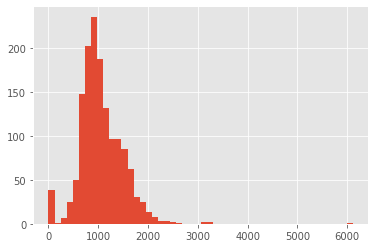

In [48]:
# TotalBsmtSF
plt.hist(df['TotalBsmtSF'], bins=50)

In [50]:
# Create a binary feature 'Basement' that indicates if the home has a basement
df['Basement'] = [1 if row > 0 else 0 for row in df['TotalBsmtSF']]

In [61]:
# YearRemodAdd
# if the year listed in both columns is the same, there has not been a renovation
# Turn into binary variable "Reno"
Year_temp = df.YearRemodAdd - df.YearBuilt
df['Reno'] = [0 if x == 0 else 1 for x in Year_temp]

In [114]:
# Conditions 1 + 2
# Only "Positive Feature" really seems to matter here -> binarize
PosFeat1 = [1 if 'Pos' in x else 0 for x in df['Condition1']]
PosFeat1 = pd.Series(PosFeat1)
PosFeat2 = [1 if 'Pos' in x else 0 for x in df['Condition2']]
PosFeat2 = pd.Series(PosFeat2)

In [115]:
temp = pd.DataFrame()
temp['PosFeat1'] = PosFeat1
temp['PosFeat2'] = PosFeat2
temp['PosFeat'] = temp.PosFeat1 + temp.PosFeat2

In [116]:
# binarize and put into df
df['PosFeat'] = [1 if x > 0 else 0 for x in temp['PosFeat']]

In [119]:
# Just in Case:
# Also binarize "Norm" col
# if Cond1 = norm, so does Cond2, so we only need to look @ one col
df['Norm'] = [1 if 'Norm' in x else 0 for x in df['Condition1']]

In [123]:
# HeatingQC - 
df.HeatingQC.value_counts()
# I strongly believe this will not be a significant predictor
# in our housing price model; the quality of heating measure is already
# encapsulated within another variable (overall qual)

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [125]:
# HouseStyle
df.HouseStyle.value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

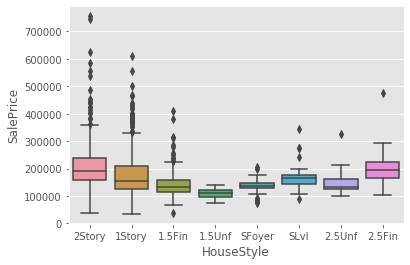

In [130]:
import seaborn as sns
sns.boxplot(y=df.SalePrice, x=df.HouseStyle)
plt.show()
# Hard to tell if it makes a discernable difference when it comes to sale price

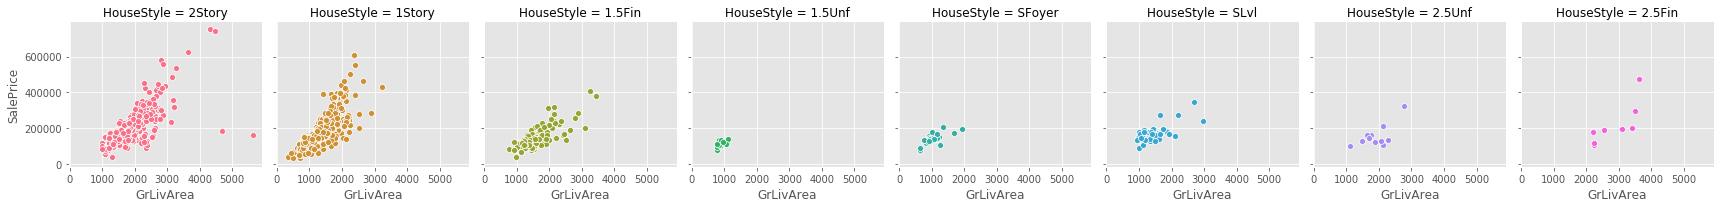

In [146]:
fct = sns.FacetGrid(df, col = 'HouseStyle', hue = 'HouseStyle')
fct.map(sns.scatterplot, "GrLivArea", "SalePrice")

In [156]:
df['TwoFloors'] = [1 if "2" in x else 0 for x in df['HouseStyle']]
# 1 = the house has 2 floors (or more)
# 0 = the house has 1 floor

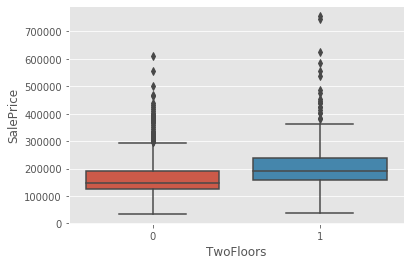

In [157]:
sns.boxplot(y=df.SalePrice, x=df.TwoFloors)
plt.show() # nice

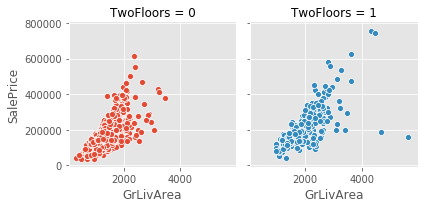

In [160]:
fct = sns.FacetGrid(df, col = 'TwoFloors', hue = 'TwoFloors')
fct.map(sns.scatterplot, "GrLivArea", "SalePrice")

In [133]:
# BldgType
df.BldgType.value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

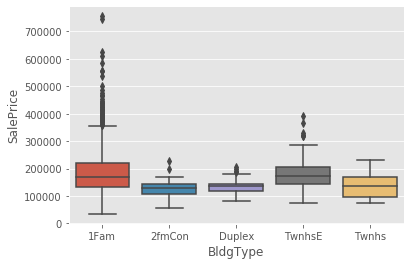

In [132]:
sns.boxplot(y=df.SalePrice, x=df.BldgType)
plt.show()

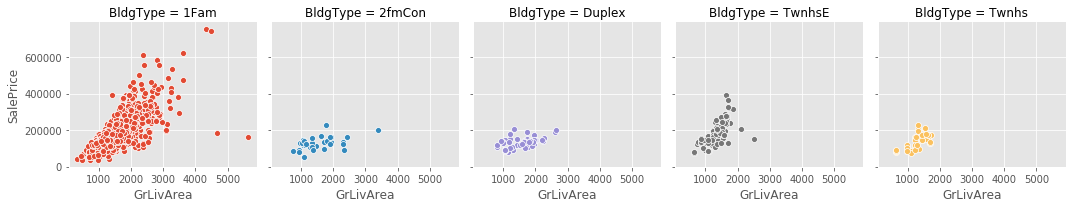

In [161]:
fct = sns.FacetGrid(df, col = 'BldgType', hue = 'BldgType')
fct.map(sns.scatterplot, "GrLivArea", "SalePrice")

In [163]:
df['OneFamHome'] = [1 if row == "1Fam" else 0 for row in df['BldgType']]

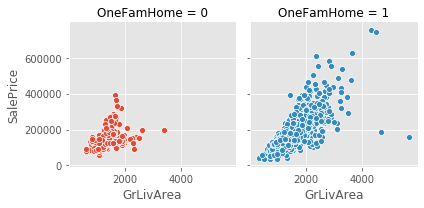

In [164]:
fct = sns.FacetGrid(df, col = 'OneFamHome', hue = 'OneFamHome')
fct.map(sns.scatterplot, "GrLivArea", "SalePrice")

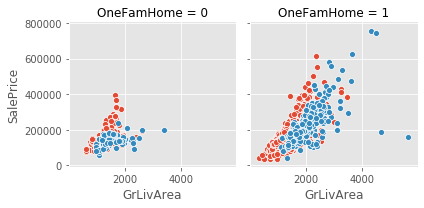

In [169]:
fct = sns.FacetGrid(df, col = 'OneFamHome', hue = 'TwoFloors')
fct.map(sns.scatterplot, "GrLivArea", "SalePrice")

# The two features may indeed be capturing unique information.